<a href="https://colab.research.google.com/github/dastronmighty/g-colab/blob/main/DeepLearningWithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Ultra Document

## with added memes

### How does the math and s**t even work?

<img src="https://cdn-images-1.medium.com/max/1600/1*3tX5wuhfLPeinWsdEemi3Q.jpeg" width=500 />

and he is correct. Later on we gonna do some GPU magiké but for now lets stick 
with the basics

sidenote im following [this](https://pytorch.org/tutorials/beginner/nn_tutorial.html) but im doing it better 

## Setup

In [2]:
! pip install -q  torchviz

In [3]:
! pip install -q hiddenlayer

In [22]:
import math # quick maths

import time

from matplotlib import pyplot as plt

import numpy as np

import pandas as pd #for good luck (who knows we might need it)


# The Golden Child
import torch

from torch import nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from torchsummary import summary

from torchviz import make_dot

import hiddenlayer as hl


from IPython.core.debugger import set_trace # debug time (now imagine toby mcguire saying it)

import ipywidgets as widgets
from IPython.display import display

In [5]:
random_s_in = widgets.IntText(value=42,description='Random Seed:',disabled=False,style={'description_width': 'initial'})
epoch_slider = widgets.IntSlider(value=15, min=1,max=100, description="Epochs",style={'description_width': 'initial'})
learning_weight = widgets.FloatSlider(value=0.001,min=0.001,max=0.999,step=0.001,description='Learning Rate:',readout=True,readout_format='.3f',style={'description_width': 'initial'})
batch_slider = widgets.IntSlider(value=64, min=32,max=1024, step=32,description="Batch Size",style={'description_width': 'initial'})
display(random_s_in, epoch_slider, learning_weight, batch_slider)

IntText(value=42, description='Random Seed:', style=DescriptionStyle(description_width='initial'))

IntSlider(value=15, description='Epochs', min=1, style=SliderStyle(description_width='initial'))

FloatSlider(value=0.001, description='Learning Rate:', max=0.999, min=0.001, readout_format='.3f', step=0.001,…

IntSlider(value=64, description='Batch Size', max=1024, min=32, step=32, style=SliderStyle(description_width='…

In [6]:
RANDOM_SEED = random_s_in.value
EPOCHS = epoch_slider.value
LEARNING_RATE = learning_weight.value
BATCH_SIZE = batch_slider.value
print(RANDOM_SEED, EPOCHS, LEARNING_RATE, BATCH_SIZE)

42 15 0.001 64


## Data

Google colab gives us some helpful data in the 'content' directory so we are going to use it for the first "lessons"

In [7]:
mnist_test = pd.read_csv("/content/sample_data/mnist_test.csv")
mnist_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")

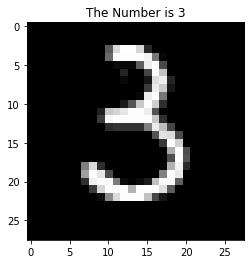

In [8]:
y_test_ = mnist_test.values[:,0].astype(int)
x_test_ = mnist_test.values[:,1:].astype(float)
y_train_ = mnist_train.values[:,0].astype(int)
x_train_ = mnist_train.values[:,1:].astype(float)

np.random.seed(RANDOM_SEED)
idx = np.random.randint(0, x_train_.shape[0]) - 9
x = plt.title("The Number is "+str(y_train_[idx]))
x = plt.imshow(x_train_[idx].reshape((28, 28)), cmap="gray")

In [9]:
x_train = torch.tensor(x_train_, dtype=torch.float)
y_train = torch.tensor(y_train_, dtype=torch.long)
x_test = torch.tensor(x_test_, dtype=torch.float)
y_test  = torch.tensor(y_test_, dtype=torch.long)

n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 7, 9,  ..., 2, 9, 5])
torch.Size([19999, 784])
tensor(0) tensor(9)


## Model ("from scratch")

In [ ]:
torch.manual_seed(RANDOM_SEED)
weights = torch.randn(784, 10) * 0.001
weights.requires_grad_()
torch.manual_seed(RANDOM_SEED)
bias = torch.randn(10, requires_grad=True)

def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [ ]:
preds = model(x_train)
preds[0]

tensor([-3.7377, -3.7460, -1.4511, -4.3113, -7.5470, -1.9996, -4.6817, -4.0796,
        -1.7532, -0.9955], grad_fn=<SelectBackward>)

In [ ]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

print(loss_func(preds, y_train))

tensor(4.4897, grad_fn=<NegBackward>)


In [ ]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

acc = accuracy(preds, y_train)
print(f"Accuracy {acc}")

Accuracy 0.12800639867782593


In [ ]:
(weights, bias)

(tensor([[ 1.9269e-03,  1.4873e-03,  9.0072e-04,  ..., -1.6047e-03,
          -7.5214e-04,  1.6487e-03],
         [-3.9248e-04, -1.4036e-03, -7.2788e-04,  ..., -1.5960e-04,
          -4.9740e-04,  4.3959e-04],
         [-7.5813e-04,  1.0783e-03,  8.0080e-04,  ...,  1.3347e-03,
          -2.3162e-04,  4.1759e-05],
         ...,
         [-5.5956e-05, -4.5470e-04,  1.2942e-03,  ...,  1.1133e-03,
           2.1901e-03,  3.5307e-04],
         [ 4.4739e-04,  7.1917e-04, -1.9300e-03,  ..., -8.7139e-04,
           2.2347e-04,  2.5284e-04],
         [ 2.1689e-04,  4.6998e-04,  3.2675e-04,  ...,  4.7023e-05,
           5.4871e-04, -1.9951e-03]], requires_grad=True),
 tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
          0.4617,  0.2674], requires_grad=True))

In [ ]:
preds = model(x_train)

In [ ]:
loss = loss_func(preds, y_train)

In [ ]:
loss.backward()

In [ ]:
(weights.grad, bias.grad)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([-0.0925, -0.0294, -0.0304, -0.0710, -0.0937, -0.0555,  0.0811, -0.0949,
          0.2189,  0.1675]))

In [ ]:
with torch.no_grad():
  weights -= weights.grad * LEARNING_RATE
  bias -= bias.grad * LEARNING_RATE
  weights.grad.zero_()
  bias.grad.zero_()

In [ ]:
pred = model(x_train)
acc1 = accuracy(pred, y_train).item()
print(f"Accuracy before gradient \"backprop\" {acc}")
print(f"Accuracy after  gradient \"backprop\" {acc1}")

Accuracy before gradient "backprop" 0.12800639867782593
Accuracy after  gradient "backprop" 0.09985499083995819


Well look at that. The accuracy went up!

## Baby Pytorch aka applying OOP stuff 

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.kym-cdn.com%2Fentries%2Ficons%2Ffacebook%2F000%2F035%2F094%2FBased_Department_Thumbnail.jpg&f=1&nofb=1" width=500 />


Introducing nn.Module : https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module  

Introducing nn.Parameter : https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter  

Introducing nn.functional [loss funcitons](https://pytorch.org/docs/stable/nn.functional.html#cross-entropy) [activation funcitons](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions)

In [ ]:
loss_func = F.cross_entropy # https://pytorch.org/docs/stable/nn.functional.html#cross-entropy
class Mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) * 0.001)
        self.bias = nn.Parameter(torch.randn(10))

    def forward(self, xb):
        f1 = xb @ self.weights + self.bias
        return F.log_softmax(f1, dim=1)

In [ ]:
torch.manual_seed(RANDOM_SEED)
model1 = Mnist_model()
for p in model1.parameters():
  print(p)

Parameter containing:
tensor([[ 1.9269e-03,  1.4873e-03,  9.0072e-04,  ..., -1.6047e-03,
         -7.5214e-04,  1.6487e-03],
        [-3.9248e-04, -1.4036e-03, -7.2788e-04,  ..., -1.5960e-04,
         -4.9740e-04,  4.3959e-04],
        [-7.5813e-04,  1.0783e-03,  8.0080e-04,  ...,  1.3347e-03,
         -2.3162e-04,  4.1759e-05],
        ...,
        [-5.5956e-05, -4.5470e-04,  1.2942e-03,  ...,  1.1133e-03,
          2.1901e-03,  3.5307e-04],
        [ 4.4739e-04,  7.1917e-04, -1.9300e-03,  ..., -8.7139e-04,
          2.2347e-04,  2.5284e-04],
        [ 2.1689e-04,  4.6998e-04,  3.2675e-04,  ...,  4.7023e-05,
          5.4871e-04, -1.9951e-03]], requires_grad=True)
Parameter containing:
tensor([ 1.3673, -0.3805,  0.4782,  1.3093,  0.5289,  1.6473,  1.4642,  0.2509,
         0.9407,  0.8538], requires_grad=True)


In [ ]:
model1(x_train)[0]

tensor([-3.5219, -5.0702, -2.0221, -4.0471, -6.7100, -0.9808, -6.2405, -4.0055,
        -2.0890, -1.2239], grad_fn=<SelectBackward>)

In [ ]:
print(loss_func(model1(x_train), y_train))

tensor(4.2577, grad_fn=<NllLossBackward>)


In [ ]:
preds = model1(x_train)
acc2 = accuracy(preds, y_train)
print(f"Accuracy {acc2}")

Accuracy 0.11885594576597214


In [ ]:
loss = loss_func(model1(x_train), y_train)
loss.backward()
with torch.no_grad():
  for p in model1.parameters():
    p -= p.grad * LEARNING_RATE
  model1.zero_grad()

In [ ]:
pred = model(x_train)
acc3 = accuracy(pred, y_train).item()
print("From Scratch")
print(f"Accuracy before gradient \"backprop\" {acc}")
print(f"Accuracy after  gradient \"backprop\" {acc1}\n")
print(f"Model")
print(f"Accuracy before {acc2}")
print(f"Accuracy after {acc3}")

From Scratch
Accuracy before gradient "backprop" 0.12800639867782593
Accuracy after  gradient "backprop" 0.09985499083995819

Model
Accuracy before 0.11885594576597214
Accuracy after 0.09985499083995819


## Baby Pytorch aka applying OOP stuff (Part 2)

Introducing nn.Linear : https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) [nn.Parameter](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter) [loss funcitons](https://pytorch.org/docs/stable/nn.functional.html#cross-entropy) [activation funcitons](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions)



In [ ]:
loss_func = F.cross_entropy 

class Mnist_model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Linear(784, 10)

    def forward(self, xb):
        return F.log_softmax(self.f1(xb), dim=1)

In [ ]:
torch.manual_seed(RANDOM_SEED)
model2 = Mnist_model2()
model2.f1.bias

Parameter containing:
tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
         0.0018,  0.0163], requires_grad=True)

In [ ]:
torch.manual_seed(RANDOM_SEED)
model2 = Mnist_model2()

In [ ]:
acc4 = accuracy(model2(x_train), y_train)

loss = loss_func(model2(x_train), y_train)
loss.backward()
with torch.no_grad():
  for p in model2.parameters():
    p -= p.grad * LEARNING_RATE
  model2.zero_grad()
acc5 = accuracy(model2(x_train), y_train)

print("From Scratch")
print(f"Accuracy before gradient \"backprop\" {acc}")
print(f"Accuracy after  gradient \"backprop\" {acc1}\n")
print(f"Model")
print(f"Accuracy before {acc2}")
print(f"Accuracy after {acc3}\n")
print(f"Model (nn.linear)")
print(f"Accuracy before {acc4}")
print(f"Accuracy after {acc5}")

From Scratch
Accuracy before gradient "backprop" 0.12800639867782593
Accuracy after  gradient "backprop" 0.09985499083995819

Model
Accuracy before 0.11885594576597214
Accuracy after 0.09985499083995819

Model (nn.linear)
Accuracy before 0.14770738780498505
Accuracy after 0.38236913084983826


everyhting is slightly difference this is because of how torch is handling the radnom seeding of all the different 

## Pytorch Training Loop


In [ ]:
class Mnist_model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Linear(784, 10)

    def forward(self, xb):
        return F.log_softmax(self.f1(xb), dim=1)

In [ ]:
x_train = torch.tensor(x_train_, dtype=torch.float)
y_train = torch.tensor(y_train_, dtype=torch.long)
x_test = torch.tensor(x_test_, dtype=torch.float)
y_test  = torch.tensor(y_test_, dtype=torch.long)
n, c = x_train.shape

model3 = Mnist_model2()

epoch_loss = {}

preds = model3(x_train)
acc = accuracy(preds, y_train)
print(f"epoch {-1}/{EPOCHS} - accuracy {acc}")

for epoch in range(EPOCHS):
  epoch_loss[epoch] = []
  pred = model3(x_train)
  loss = loss_func(pred, y_train)
  loss.backward()
  epoch_loss[epoch].append(loss.item())
  with torch.no_grad():
      for p in model3.parameters():
          p -= p.grad * LEARNING_RATE
      model3.zero_grad()
  preds = model3(x_train)
  acc = accuracy(preds, y_train)
  print(f"epoch {epoch}/{EPOCHS} - accuracy {acc} - loss {np.array(epoch_loss[epoch]).mean()}")
  

epoch -1/15 - accuracy 0.053302664309740067
epoch 0/15 - accuracy 0.20086003839969635 - loss 79.10369873046875
epoch 1/15 - accuracy 0.45312264561653137 - loss 171.3454132080078
epoch 2/15 - accuracy 0.28891444206237793 - loss 298.15283203125
epoch 3/15 - accuracy 0.47912395000457764 - loss 352.7096862792969
epoch 4/15 - accuracy 0.3945697247982025 - loss 327.44842529296875
epoch 5/15 - accuracy 0.46417319774627686 - loss 255.85569763183594
epoch 6/15 - accuracy 0.5933796763420105 - loss 136.38671875
epoch 7/15 - accuracy 0.6091304421424866 - loss 99.59529113769531
epoch 8/15 - accuracy 0.6703835129737854 - loss 58.26620101928711
epoch 9/15 - accuracy 0.789139449596405 - loss 69.35762786865234
epoch 10/15 - accuracy 0.8078904151916504 - loss 17.35070037841797
epoch 11/15 - accuracy 0.7762387990951538 - loss 15.038479804992676
epoch 12/15 - accuracy 0.7613380551338196 - loss 18.746440887451172
epoch 13/15 - accuracy 0.6959847807884216 - loss 26.37175941467285
epoch 14/15 - accuracy 0.72

Wait the loss didn't go down and the accuracy is whack.... we are gonna fix this now

Why did this happen? [Overfitting](https://www.techopedia.com/definition/32512/overfitting) or [vanishing gradient](https://www.mygreatlearning.com/blog/the-vanishing-gradient-problem/) look below for a quick solution (something which is done anyway)

## Pytorch Training Loop (But with Mini-Batches)

---

## Batch

**Batch gradient** descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

One cycle through the entire training dataset is called a training epoch. Therefore, it is often said that batch gradient descent performs model updates at the end of each training epoch.

### Upsides (Batch)

*  Fewer updates to the model means this variant of gradient descent is more computationally efficient than stochastic gradient descent.
* The decreased update frequency results in a more stable error gradient and may result in a more stable convergence on some problems.
* The separation of the calculation of prediction errors and the model update lends the algorithm to parallel processing based implementations.

### Downsides (Batch)

* The more stable error gradient may result in premature convergence of the model to a less optimal set of parameters.
* The updates at the end of the training epoch require the additional complexity of accumulating prediction errors across all training examples.
* Commonly, batch gradient descent is implemented in such a way that it requires the entire training dataset in memory and available to the algorithm.
* Model updates, and in turn training speed, may become very slow for large datasets.

---

## Mini-Batch

Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Implementations may choose to sum the gradient over the mini-batch which further reduces the variance of the gradient.

Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.

### Upsides (Mini-Batch)

* The model update frequency is higher than batch gradient descent which allows for a more robust convergence, avoiding local minima.
* The batched updates provide a computationally more efficient process than stochastic gradient descent.
* The batching allows both the efficiency of not having all training data in memory and algorithm implementations.

### Downsides (Mini-Batch)
* Mini-batch requires the configuration of an additional “mini-batch size” hyperparameter for the learning algorithm.
* Error information must be accumulated across mini-batches of training examples like batch gradient descent.


In [ ]:
class Mnist_model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Linear(784, 10)

    def forward(self, xb):
        return F.log_softmax(self.f1(xb), dim=1)
  
mod = Mnist_model()

In [ ]:
x_train = torch.tensor(x_train_, dtype=torch.float)
y_train = torch.tensor(y_train_, dtype=torch.long)
x_test = torch.tensor(x_test_, dtype=torch.float)
y_test  = torch.tensor(y_test_, dtype=torch.long)
n, c = x_train.shape

epoch_loss = {}

preds = mod(x_train)
acc = accuracy(preds, y_train)
print(f"epoch {-1}/{EPOCHS} - accuracy {acc}")

for epoch in range(EPOCHS):
  epoch_loss[epoch] = []
  for i in range((n - 1) // BATCH_SIZE + 1): # MINI BATCHES 
    start_i = i * BATCH_SIZE # MINI BATCHES 
    end_i = start_i + BATCH_SIZE # MINI BATCHES 

    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]

    loss = loss_func(mod(xb), yb)
    epoch_loss[epoch].append(loss.item())
    loss.backward()
    
    with torch.no_grad():
      for p in mod.parameters():
        p -= p.grad * LEARNING_RATE
      mod.zero_grad()
    
  acc = accuracy(mod(x_train), y_train)
  print(f"epoch {epoch}/{EPOCHS}")
  print(f"\t- accuracy {acc}")
  print(f"\t- loss {np.array(epoch_loss[epoch]).mean()}")

epoch -1/15 - accuracy 0.09275463968515396
epoch 0/15
	- accuracy 0.8144907355308533
	- loss 34.13273558906092
epoch 1/15
	- accuracy 0.8567928671836853
	- loss 18.820590083210615
epoch 2/15
	- accuracy 0.8566428422927856
	- loss 16.955035898251275
epoch 3/15
	- accuracy 0.8736937046051025
	- loss 14.570990884802196
epoch 4/15
	- accuracy 0.8299915194511414
	- loss 14.3328085471266
epoch 5/15
	- accuracy 0.876943826675415
	- loss 13.835554712496627
epoch 6/15
	- accuracy 0.8707935214042664
	- loss 13.821389157789202
epoch 7/15
	- accuracy 0.8610430359840393
	- loss 12.561375362233232
epoch 8/15
	- accuracy 0.8912445902824402
	- loss 13.496105644935236
epoch 9/15
	- accuracy 0.8830441236495972
	- loss 12.594873450315609
epoch 10/15
	- accuracy 0.8626431226730347
	- loss 12.393342218269556
epoch 11/15
	- accuracy 0.904795229434967
	- loss 12.088932613976086
epoch 12/15
	- accuracy 0.8815940618515015
	- loss 12.244654953670198
epoch 13/15
	- accuracy 0.8940446972846985
	- loss 12.52809390

##  REFACTOR O'CLOCK


Introducing Tensor Dataset : https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

Introducing Tensor DataLoader : https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

Introducing [optim](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) [Stochastic Gradient Descent](https://pytorch.org/docs/stable/_modules/torch/optim/sgd.html#SGD)


[nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) [nn.Parameter](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter) [loss funcitons](https://pytorch.org/docs/stable/nn.functional.html#cross-entropy) [activation funcitons](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions)

In [ ]:
class Mnist_4Layer(nn.Module):
    def __init__(self):
        super().__init__()
        self.inp = nn.Linear(784, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, xb):
        feed = self.out(self.inp(xb))
        return F.log_softmax(feed, dim=1)
  
model4 = Mnist_4Layer() 
opt = torch.optim.SGD(model4.parameters(), lr=LEARNING_RATE) # OPTIMIZER TIME

x_train = torch.tensor(x_train_, dtype=torch.float)
y_train = torch.tensor(y_train_, dtype=torch.long)
x_test = torch.tensor(x_test_, dtype=torch.float)
y_test  = torch.tensor(y_test_, dtype=torch.long)

n, c = x_train.shape

train_ds = TensorDataset(x_train, y_train) # Put data in a dataset
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE) # Put dataset in a dataloader

In [ ]:
total_parameters = 0
for p in model4.parameters():
  total_parameters += np.prod(p.size())
total_parameters

50890

In [ ]:
epoch_loss = {}
for epoch in range(EPOCHS):
  epoch_loss[epoch]= []
  for xb, yb in train_dl:
    loss = loss_func(model4(xb), yb)
    epoch_loss[epoch].append(loss.item())
    loss.backward()
    opt.step()
    opt.zero_grad()
  acc = accuracy(model4(x_train), y_train)
  print(f"epoch {epoch+1}/{EPOCHS}")
  print(f"\t- accuracy {acc}")
  print(f"\t- loss {np.array(epoch_loss[epoch]).mean()}")
t_acc = accuracy(model4(x_test), y_test)
print(f"Test accuracy {t_acc}")

epoch 1/15
	- accuracy 0.8721436262130737
	- loss 6.847581973471962
epoch 2/15
	- accuracy 0.8840442299842834
	- loss 0.8659012737794044
epoch 3/15
	- accuracy 0.8716936111450195
	- loss 0.5457172826075325
epoch 4/15
	- accuracy 0.8848942518234253
	- loss 0.43755984432495443
epoch 5/15
	- accuracy 0.8938946723937988
	- loss 0.387576367122868
epoch 6/15
	- accuracy 0.9010950326919556
	- loss 0.36045452554861956
epoch 7/15
	- accuracy 0.9061952829360962
	- loss 0.34399788105449736
epoch 8/15
	- accuracy 0.9094454646110535
	- loss 0.3327209719310934
epoch 9/15
	- accuracy 0.9118955731391907
	- loss 0.32421821922349475
epoch 10/15
	- accuracy 0.9136456847190857
	- loss 0.31743103608536644
epoch 11/15
	- accuracy 0.9145457148551941
	- loss 0.3117841675687141
epoch 12/15
	- accuracy 0.9164458513259888
	- loss 0.30692936887089817
epoch 13/15
	- accuracy 0.9176458716392517
	- loss 0.3026497086492209
epoch 14/15
	- accuracy 0.9185459017753601
	- loss 0.29880631619844195
epoch 15/15
	- accuracy 

Well finally look at that! accuracy go up loss go down! its basically learning!

<img src="https://i.redd.it/nc5ua4x8lfg31.png" width=500 />

## Refactor 2 Electric Boogaloo

In [ ]:
x_train = torch.tensor(x_train_, dtype=torch.float)
y_train = torch.tensor(y_train_, dtype=torch.long)
x_test = torch.tensor(x_test_, dtype=torch.float)
y_test  = torch.tensor(y_test_, dtype=torch.long)
n, c = x_train.shape

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
valid_ds = TensorDataset(x_test, y_test)
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE * 2)

def loss_batch(model, loss_func, xb, yb, opt=None):
  loss = loss_func(model(xb), yb)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item(), len(xb)

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
  history = []
  for epoch in range(epochs):
    t1 = int(time.time() * 1000) 
    model.train()
    for xb, yb in train_dl:
      loss_batch(model, loss_func, xb, yb, opt)
    model.eval()
    with torch.no_grad():
      losses, nums = zip(
        *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
      )
    val_acc = np.array([accuracy(model(xb), yb).item() for xb, yb in valid_dl]).mean()
    val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
    t_ex = round((int(time.time() * 1000) ) - t1, 0)
    history.append({
        "epoch": epoch,
        "val_acc": val_acc,
        "val_loss": val_loss,
        "time": t_ex
    })
    print(f"Epoch: {epoch+1}\tVal. Loss: {val_loss}\tVal. Acc. {val_acc}\tTime {t_ex}ms")
  return history

model4 = Mnist_4Layer() 
opt = torch.optim.SGD(model4.parameters(), lr=LEARNING_RATE)
history1 = fit(EPOCHS, model4, loss_func, opt, train_dl, valid_dl)

Epoch: 1	Val. Loss: 1.0691179812553584	Val. Acc. 0.8925501055355314	Time 923ms
Epoch: 2	Val. Loss: 0.751519966286735	Val. Acc. 0.8792985232570504	Time 811ms
Epoch: 3	Val. Loss: 0.5220511012812807	Val. Acc. 0.8767273207254047	Time 802ms
Epoch: 4	Val. Loss: 0.47603546651360606	Val. Acc. 0.8844409283203415	Time 799ms
Epoch: 5	Val. Loss: 0.4125236350365288	Val. Acc. 0.8954179852823668	Time 811ms
Epoch: 6	Val. Loss: 0.48746596212827725	Val. Acc. 0.874202268033088	Time 818ms
Epoch: 7	Val. Loss: 0.4199807307299095	Val. Acc. 0.8943301688266706	Time 809ms
Epoch: 8	Val. Loss: 0.37446385597956755	Val. Acc. 0.9012064873417721	Time 816ms
Epoch: 9	Val. Loss: 0.4479860054879132	Val. Acc. 0.883946466295025	Time 797ms
Epoch: 10	Val. Loss: 0.435896041374145	Val. Acc. 0.8743539030038858	Time 806ms
Epoch: 11	Val. Loss: 0.46860426840501757	Val. Acc. 0.858577268033088	Time 812ms
Epoch: 12	Val. Loss: 0.3647937056991217	Val. Acc. 0.9040216245228732	Time 809ms
Epoch: 13	Val. Loss: 0.4274174020920817	Val. Acc. 

<img src="https://media1.tenor.com/images/2bf30b6dfae9bd44be613a13deb6b52b/tenor.gif?itemid=12466201" alt="yeeeeee boi"  width=250/>

## CNN Time

Understanding CNN'a  
https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148

Understanding nn.sequential   
https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential


Understanding nn.ReLU   
https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU


Understanding nn.Conv2D. 
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d


Understanding nn.AdaptiveAvgPool2d https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html#torch.nn.AdaptiveAvgPool2d


In [ ]:
class Mnist_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
    self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
    self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

  def forward(self, xb):
    xb = xb.view(-1, 1, 28, 28)
    xb = F.relu(self.conv1(xb))
    xb = F.relu(self.conv2(xb))
    xb = F.relu(self.conv3(xb))
    xb = F.avg_pool2d(xb, 4)
    return xb.view(-1, xb.size(1))

model = Mnist_CNN()
opt = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

cnnhist1 = fit(EPOCHS, model, loss_func, opt, train_dl, valid_dl)

Epoch: 1	Val. Loss: 0.7380812551208896	Val. Acc. 0.7755010550535177	Time 2845ms
Epoch: 2	Val. Loss: 0.4378509386153397	Val. Acc. 0.8667919303797469	Time 2606ms
Epoch: 3	Val. Loss: 0.38099670012329967	Val. Acc. 0.888943829113924	Time 2612ms
Epoch: 4	Val. Loss: 0.32389138697242603	Val. Acc. 0.9056566455696202	Time 2607ms
Epoch: 5	Val. Loss: 0.2964937323016046	Val. Acc. 0.9156447784810127	Time 2582ms
Epoch: 6	Val. Loss: 0.2682846642297433	Val. Acc. 0.9222705696202531	Time 2640ms
Epoch: 7	Val. Loss: 0.2433476589146209	Val. Acc. 0.9292919303797469	Time 2590ms
Epoch: 8	Val. Loss: 0.23189513797596348	Val. Acc. 0.9329509493670886	Time 2633ms
Epoch: 9	Val. Loss: 0.22838670839349254	Val. Acc. 0.9324564873417721	Time 2599ms
Epoch: 10	Val. Loss: 0.23267159216131644	Val. Acc. 0.9308742088607594	Time 2638ms
Epoch: 11	Val. Loss: 0.24616178944863396	Val. Acc. 0.9281052215189873	Time 2638ms
Epoch: 12	Val. Loss: 0.23290714428209924	Val. Acc. 0.9294897151898734	Time 2655ms
Epoch: 13	Val. Loss: 0.21799166

Let’s get rid of these two assumptions, so our model works with any 2d single channel image. First, we can remove the initial Lambda layer but moving the data preprocessing into a generator



Next, we can replace nn.AvgPool2d with nn.AdaptiveAvgPool2d, which allows us to define the size of the output tensor we want, rather than the input tensor we have. As a result, our model will work with any size input.

In [ ]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

train_dl, valid_dl = get_data(train_ds, valid_ds, BATCH_SIZE)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

cnnhist2 = fit(EPOCHS, model, loss_func, opt, train_dl, valid_dl)

Epoch: 1	Val. Loss: 1.2720006254866476	Val. Acc. 0.6001120783105681	Time 2652ms
Epoch: 2	Val. Loss: 1.0538338959747606	Val. Acc. 0.6907898210272004	Time 2627ms
Epoch: 3	Val. Loss: 0.8009540504462147	Val. Acc. 0.7695675107497203	Time 2621ms
Epoch: 4	Val. Loss: 0.7923366118400189	Val. Acc. 0.7669963082180747	Time 2613ms


KeyboardInterrupt: ignored

We promised at the start of this tutorial we’d explain through example each of torch.nn, torch.optim, Dataset, and DataLoader. So let’s summarize what we’ve seen:

**torch.nn**

* Module: creates a callable which behaves like a function, but can also contain state(such as neural net layer weights). It knows what Parameter (s) it contains and can zero all their gradients, loop through them for weight updates, etc.

* Parameter: a wrapper for a tensor that tells a Module that it has weights that need updating during backprop. Only tensors with the requires_grad attribute set are updated

* functional: a module(usually imported into the F namespace by convention) which contains activation functions, loss functions, etc, as well as non-stateful versions of layers such as convolutional and linear layers.

* torch.optim: Contains optimizers such as SGD, which update the weights of Parameter during the backward step

* Dataset: An abstract interface of objects with a __len__ and a __getitem__, including classes provided with Pytorch such as TensorDataset

* DataLoader: Takes any Dataset and creates an iterator which returns batches of data.

## LETS GET GPUS INVOLVED

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flinustechtips.com%2Fmain%2Fuploads%2Fmonthly_09_2015%2Fpost-253099-0-17139900-1441340727.jpg&f=1&nofb=1" width=500 />

Runtime > Change Runtime Type > Hardware accelerator - choose GPU

Once the session reloads you can just rerun setup and data until here.

In [10]:
print(torch.cuda.is_available())

True


ayyy theres a GPU here

In [11]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [12]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def loss_batch(model, loss_func, xb, yb, opt=None):
  loss = loss_func(model(xb), yb)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item(), len(xb)

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
  history = []
  for epoch in range(epochs):
    t1 = int(time.time() * 1000) 
    model.train()
    for xb, yb in train_dl:
      loss_batch(model, loss_func, xb, yb, opt)
    model.eval()
    with torch.no_grad():
      losses, nums = zip(
        *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
      )
    val_acc = np.array([accuracy(model(xb), yb).item() for xb, yb in valid_dl]).mean()
    val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
    t_ex = round((int(time.time() * 1000) ) - t1, 0)
    history.append({
        "epoch": epoch,
        "val_acc": val_acc,
        "val_loss": val_loss,
        "time": t_ex
    })
    print(f"Epoch: {epoch+1}\tVal. Loss: {val_loss}\tVal. Acc. {val_acc}\tTime {t_ex}ms")
  return history

def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess_nogpu(x, y):
    return x.view(-1, 1, 28, 28), y

def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

In [16]:
loss_func = F.cross_entropy 

train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_test, y_test)
train_dl, valid_dl = get_data(train_ds, valid_ds, BATCH_SIZE)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

model.to(dev)
opt = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

cnnhistgpu = fit(EPOCHS, model, loss_func, opt, train_dl, valid_dl)

Epoch: 1	Val. Loss: 0.5991596102130354	Val. Acc. 0.8206553278090079	Time 1296ms
Epoch: 2	Val. Loss: 0.4377286419107003	Val. Acc. 0.8676819620253164	Time 1125ms
Epoch: 3	Val. Loss: 0.33747692095010157	Val. Acc. 0.8920556442647041	Time 1131ms
Epoch: 4	Val. Loss: 0.286717852297211	Val. Acc. 0.9142602848101266	Time 1127ms
Epoch: 5	Val. Loss: 0.3743797455302285	Val. Acc. 0.8760284819180453	Time 1147ms
Epoch: 6	Val. Loss: 0.27155797938630993	Val. Acc. 0.9222705696202531	Time 1130ms
Epoch: 7	Val. Loss: 0.3029369989724675	Val. Acc. 0.9104034810126582	Time 1135ms
Epoch: 8	Val. Loss: 0.22895505493677237	Val. Acc. 0.9330498417721519	Time 1155ms
Epoch: 9	Val. Loss: 0.25535162557812496	Val. Acc. 0.9204905063291139	Time 1129ms
Epoch: 10	Val. Loss: 0.21950690642428441	Val. Acc. 0.9357199367088608	Time 1115ms
Epoch: 11	Val. Loss: 0.23957874785081568	Val. Acc. 0.9256329113924051	Time 1114ms
Epoch: 12	Val. Loss: 0.20630458665575602	Val. Acc. 0.9402689873417721	Time 1125ms
Epoch: 13	Val. Loss: 0.19072591

In [17]:
avg_time_nogpu = np.array([x["time"] for x in cnnhist2]).mean()
print(f"CNN model avg epoch time (no GPU) = {avg_time_nogpu}")

NameError: ignored

In [18]:
avg_time_gpu = np.array([x["time"] for x in cnnhistgpu]).mean()
print(f"CNN model avg epoch time (GPU) = {avg_time_gpu}")

CNN model avg epoch time (GPU) = 1141.5333333333333


## Aside - Visualize the model

In [28]:
train_dl, valid_dl = get_data(train_ds, valid_ds, BATCH_SIZE)
valid_dl = WrappedDataLoader(valid_dl, preprocess_nogpu)
model.to('cpu')
inputs, classes = next(iter(valid_dl))
y = model(inputs)

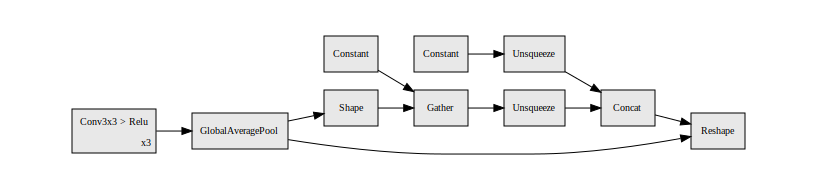

In [33]:
hl.build_graph(model, torch.zeros([16, 1, 3, 3]))

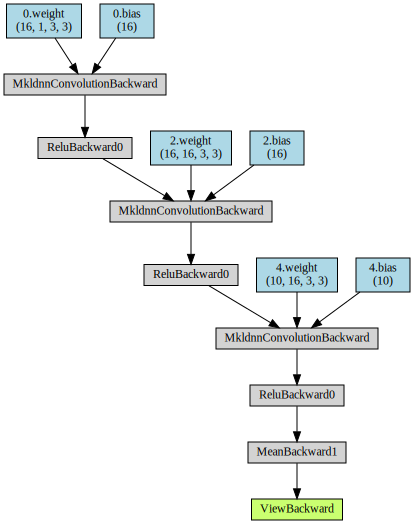

In [30]:
make_dot(y, params=dict(model.named_parameters()))

<img src="https://miro.medium.com/max/1280/1*Eg-4u0I7HGZlZmPYeeUYWA.jpeg" width=400 />

# NEXT UP - Deeper

<img src="https://miro.medium.com/proxy/1*KBobA-DaVtQ8Px6P_-tNqQ.jpeg" width=400 />

These better be helping!



## What is Deep Learning Anyway?